# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train an MLP to classify images from the MNIST database.

### 1. Load MNIST Database

In [42]:
from keras.datasets import mnist

# use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


In [43]:
X_train.shape

(60000, 28, 28)

In [44]:
X_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [45]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [46]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 2. Visualize the First Six Training Images

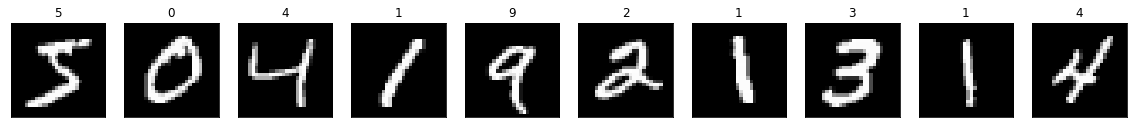

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

### 3. View an Image in More Detail

In [48]:
X_train[0, 5, 12]

3

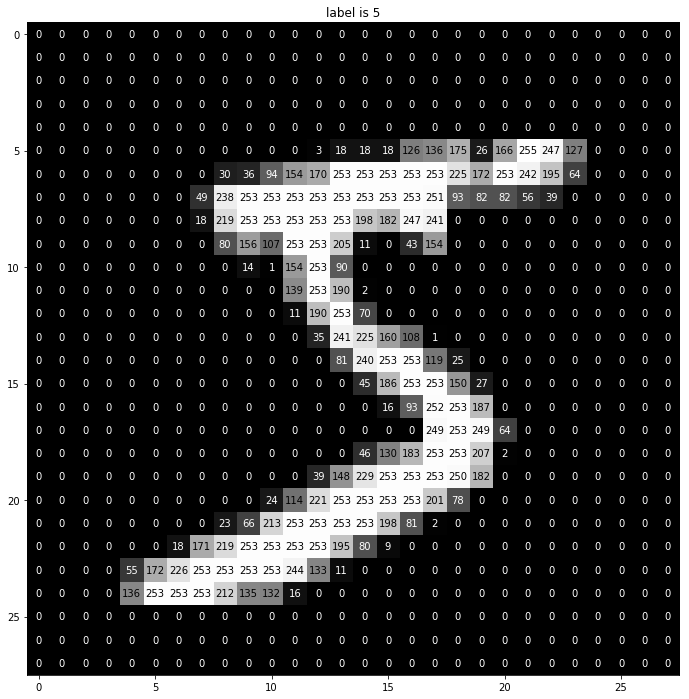

In [49]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    rows, cols = img.shape
    thresh = img.max()/2.5
    for row in range(rows):
        for col in range(cols):
            ax.annotate(
                str(round(img[row][col],2)), 
                xy=(col,row),  # x is from left to right, y is from top to bottom
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[row][col]<thresh else 'black'
            )

image_ind = 0
            
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.set_title('label is {}'.format(y_train[image_ind]))
visualize_input(X_train[image_ind], ax)

### 4. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [50]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255 

### 5. Encode Categorical Integer Labels Using a One-Hot Scheme

In [51]:
from keras.utils import to_categorical

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### 6. Define the Model Architecture

In [60]:
X_train.shape[1:]

(28, 28)

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [75]:
# input * w + b
784 * 512 + 512

401920

### 7. Compile the Model

In [76]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 8. Calculate the Classification Accuracy on the Test Set (Before Training)

In [77]:
# statically, since it's random prediction, accuracy should be around 1/10

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 148us/step
Test accuracy: 9.6000%


### 9. Train the Model

In [79]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2, 
          callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47872/48000 [============================>.] - ETA: 0s - loss: 0.1493 - acc: 0.9548
Epoch 00001: val_loss improved from inf to 0.11830, saving model to mnist.model.best.hdf5
48000/48000 [==============================] - 12s 256us/step - loss: 0.1493 - acc: 0.9548 - val_loss: 0.1183 - val_acc: 0.9627
Epoch 2/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.0942 - acc: 0.9710
Epoch 00002: val_loss improved from 0.11830 to 0.08919, saving model to mnist.model.best.hdf5
48000/48000 [==============================] - 12s 244us/step - loss: 0.0944 - acc: 0.9709 - val_loss: 0.0892 - val_acc: 0.9732
Epoch 3/10
47744/48000 [============================>.] - ETA: 0s - loss: 0.0708 - acc: 0.9780
Epoch 00003: val_loss improved from 0.08919 to 0.08737, saving model to mnist.model.best.hdf5
48000/48000 [==============================] - 12s 251us/step - loss: 0.0706 - acc: 0.9781 - val_loss: 0.0874 - val_acc: 0.9751
Epo

### 10. Load the Model with the Best Classification Accuracy on the Validation Set

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.get_config()

[{'class_name': 'Flatten',
  'config': {'batch_input_shape': (None, 28, 28),
   'dtype': 'float32',
   'name': 'flatten_3',
   'trainable': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_4',
   'trainable': True,
   'units': 512,
   'use_bias': True}},
 {'class_name': 'Dropout',
  'config': {'name': 'dropout_3',
   'noise_shape': None,
   'rate': 0.2,
   'seed': None,
   'trainable': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'b

In [84]:
model.get_weights()

[array([[ 0.0551886 , -0.01906601,  0.03491425, ...,  0.01125032,
          0.04032925, -0.00401548],
        [ 0.00375291,  0.00410521, -0.01629966, ..., -0.00604407,
          0.01631389,  0.04306754],
        [-0.01538745,  0.02502684,  0.0487901 , ...,  0.04182443,
          0.00319095, -0.02654668],
        ..., 
        [-0.03590973,  0.01211192, -0.04678836, ...,  0.04511276,
         -0.0627781 , -0.05208237],
        [-0.02840627,  0.05922045,  0.03818565, ..., -0.01956493,
          0.05645116,  0.06341755],
        [-0.05526255, -0.03238409, -0.05596113, ..., -0.06576158,
          0.06482244, -0.02246275]], dtype=float32),
 array([ -5.10561615e-02,   2.27450393e-02,  -5.35361916e-02,
         -4.54448201e-02,   3.64316218e-02,  -3.07600517e-02,
         -3.54929711e-03,   1.00417016e-02,  -3.37932520e-02,
         -5.20573296e-02,  -1.64133776e-02,  -3.70689072e-02,
         -2.04220917e-02,   3.59999649e-02,  -1.95279717e-02,
         -3.78652476e-02,  -1.68556254e-02,  -1

In [85]:
model.to_json()

'{"class_name": "Sequential", "config": [{"class_name": "Flatten", "config": {"name": "flatten_3", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32"}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "units": 512, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_3", "trainable": true, "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_5", "trainable": true, "units": 512, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "d

In [87]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [88]:
model.get_weights()

[array([[ 0.0551886 , -0.01906601,  0.03491425, ...,  0.01125032,
          0.04032925, -0.00401548],
        [ 0.00375291,  0.00410521, -0.01629966, ..., -0.00604407,
          0.01631389,  0.04306754],
        [-0.01538745,  0.02502684,  0.0487901 , ...,  0.04182443,
          0.00319095, -0.02654668],
        ..., 
        [-0.03590973,  0.01211192, -0.04678836, ...,  0.04511276,
         -0.0627781 , -0.05208237],
        [-0.02840627,  0.05922045,  0.03818565, ..., -0.01956493,
          0.05645116,  0.06341755],
        [-0.05526255, -0.03238409, -0.05596113, ..., -0.06576158,
          0.06482244, -0.02246275]], dtype=float32),
 array([-0.03018265,  0.02041194, -0.04656867, -0.02798267,  0.02843459,
        -0.02349899,  0.00049711,  0.01674723, -0.02185625, -0.04352218,
         0.0013381 , -0.01651886, -0.00972337,  0.0192754 , -0.00770887,
        -0.03632908, -0.01291954, -0.02481786, -0.02688323,  0.02288646,
        -0.00140688, -0.04318942, -0.03964631, -0.03917293, -0.01

### 11. Calculate the Classification Accuracy on the Test Set

In [90]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

10000/10000 [==============================] - 1s 120us/step
Test accuracy: 98.3100%


### 12. Explore different parameters


no input scale 	no overfit loss: 9.6855 - acc: 0.3989 - val_loss: 9.5789 - val_acc: 0.4056 Test accuracy: 40.2900%
 
 
 
decrease h nodes	yes overfit  loss: 0.0926 - acc: 0.9713 - val_loss: 0.0937 - val_acc: 0.9735  Test accuracy: 97.5800%
increase h nodes	yes overfit  loss: 0.0566 - acc: 0.9830 - val_loss: 0.0989 - val_acc: 0.9751  Test accuracy: 97.3600%


decrease h layer  yes overfit  	loss: 0.0358 - acc: 0.9891 - val_loss: 0.0778 - val_acc: 0.9796  Test accuracy: 98.1900%
increase h layer  yes overfit	loss: 0.0840 - acc: 0.9783 - val_loss: 0.0972 - val_acc: 0.9762  Test accuracy: 97.6600%


remove relu no overfit loss: 0.3191 - acc: 0.9116 - val_loss: 0.2879 - val_acc: 0.9227 Test accuracy: 91.6500%



remove dropout	yes overfit loss: 0.0901 - acc: 0.9729 - val_loss: 0.0901 - val_acc: 0.9747 Test accuracy: 97.5500%



reduce batch size  yes overfit loss: 0.2432 - acc: 0.9275 - val_loss: 0.1277 - val_acc: 0.9647 Test accuracy: 96.6300%
add batch size     yes overfit loss: 0.0493 - acc: 0.9844 - val_loss: 0.0757 - val_acc: 0.9778 Test accuracy: 97.5800%


sgd  		no overfit  loss: 0.2821 - acc: 0.9171 - val_loss: 0.2280 - val_acc: 0.9357  Test accuracy: 93.3600%
